In [1]:
import pandas as pd
from transformers import LlamaTokenizerFast
import matplotlib.pyplot as plt
import seaborn as sns
import os

/opt/homebrew/Caskroom/miniforge/base/envs/mester_nlp_mini/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
project_root = "../"
processed_root = os.path.join(project_root, "data", "processed")

# Sets for unique folders
unique_as_expected_folders = set()
unique_not_as_expected_folders = set()

# Sets for unique PDF files
unique_pdf_files_as_expected = set()
unique_pdf_files_not_as_expected = set()

for root, dirs, files in os.walk(processed_root):
    # Determine the current folder's name (the last part of the path)
    folder_name = os.path.basename(root)
    
    if folder_name == "as_expected":
        unique_as_expected_folders.add(root)
        for f in files:
            if f.lower().endswith(".pdf"):
                pdf_path = os.path.join(root, f)
                unique_pdf_files_as_expected.add(pdf_path)
    elif folder_name == "not_as_expected":
        unique_not_as_expected_folders.add(root)
        for f in files:
            if f.lower().endswith(".pdf"):
                pdf_path = os.path.join(root, f)
                unique_pdf_files_not_as_expected.add(pdf_path)

# If you need a combined set of unique folders from both categories:
unique_folders = unique_as_expected_folders.union(unique_not_as_expected_folders)

# Convert to lists if needed
unique_folders_list = list(unique_folders)
unique_pdf_files_as_expected_list = list(unique_pdf_files_as_expected)
unique_pdf_files_not_as_expected_list = list(unique_pdf_files_not_as_expected)

print("Number of unique as_expected folders:", len(unique_as_expected_folders))
print("Number of unique not_as_expected folders:", len(unique_not_as_expected_folders))
print("Number of combined unique folders:", len(unique_folders_list))
print("Number of unique PDF files (as_expected):", len(unique_pdf_files_as_expected_list))
print("Number of unique PDF files (not_as_expected):", len(unique_pdf_files_not_as_expected_list))
# total number of unique PDF files
print("Total number of unique PDF files:", len(unique_pdf_files_as_expected_list) + len(unique_pdf_files_not_as_expected_list))

Number of unique as_expected folders: 171
Number of unique not_as_expected folders: 57
Number of combined unique folders: 228
Number of unique PDF files (as_expected): 193
Number of unique PDF files (not_as_expected): 113
Total number of unique PDF files: 306


In [18]:
project_root = "../"
processed_root = os.path.join(project_root, "data", "processed")

# List to hold full paths of CSV files ending with "parsed.csv"
parsed_csv_files = []

for root, dirs, files in os.walk(processed_root):
    # Check if the current directory is named "as_expected"
    if os.path.basename(root) == "as_expected":
        for f in files:
            # Check if file name ends with "parsed.csv" (case-insensitive)
            if f.lower().endswith("parsed.csv"):
                csv_path = os.path.join(root, f)
                parsed_csv_files.append(csv_path)

print("Number of .csv files ending with 'parsed.csv' in as_expected folders:", len(parsed_csv_files))

Number of .csv files ending with 'parsed.csv' in as_expected folders: 193


In [9]:
# Offerings 2023_parsed_1.csv
df = pd.read_csv('../data/processed/219/as_expected/Offerings 2023_parsed.csv')
df[df["Section Title"]=="RISK FACTORS"]

,Prospectus ID,Original Filename,Section ID,Section Title,Subsection ID,Subsection Title,Subsubsection ID,Subsubsection Title,Subsubsection Text,Parsing Error,From Folder,Prospectus Year,PDF Page Count,Market Dynamics - a,Intra-Industry Competition - a,Regulatory Framework - a,Technology Risk - a
18,219,Offerings 2023.md,13,RISK FACTORS,13.1,Risks Related to Our Market and Our Business,13.1.1,Our results of operations could be materially ...,Demand for our products and services is sensit...,NaN,as_expected,2023,400,"{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection..."
19,219,Offerings 2023.md,13,RISK FACTORS,13.1,Risks Related to Our Market and Our Business,13.1.2,Our results of operations depend on economic d...,We operate primarily in the Swiss market and g...,NaN,as_expected,2023,400,"{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection..."
20,219,Offerings 2023.md,13,RISK FACTORS,13.1,Risks Related to Our Market and Our Business,13.1.3,The Swiss telecommunications market is charact...,We face strong competition from established co...,NaN,as_expected,2023,400,"{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection..."
21,219,Offerings 2023.md,13,RISK FACTORS,13.1,Risks Related to Our Market and Our Business,13.1.4,We also face high levels of competition from r...,Resellers and MVNOs have been increasing their...,NaN,as_expected,2023,400,"{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection..."
22,219,Offerings 2023.md,13,RISK FACTORS,13.1,Risks Related to Our Market and Our Business,13.1.5,We face increasing competition from alternativ...,We are facing increasing competition from non-...,NaN,as_expected,2023,400,"{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,219,Offerings 2023.md,13,RISK FACTORS,13.4,Risks Related to the Notes and Our Structure,13.4.13,Investors may face foreign exchange risks by i...,The Notes will be denominated and payable in S...,NaN,as_expected,2023,400,"{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection..."
84,219,Offerings 2023.md,13,RISK FACTORS,13.4,Risks Related to the Notes and Our Structure,13.4.14,"Credit ratings may not reflect all risks, are ...",One or more independent credit rating agencies...,NaN,as_expected,2023,400,"{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection..."
85,219,Offerings 2023.md,13,RISK FACTORS,13.4,Risks Related to the Notes and Our Structure,13.4.15,"The Notes will be held in book-entry form, and...",Unless and until Notes in definitive registere...,NaN,as_expected,2023,400,"{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection...","{""detection_step_attempt_count"": 1, ""detection..."
86,219,Offerings 2023.md,13,RISK FACTORS,13.5,Risks Related to Our Ownership,13

In [17]:
df = pd.read_csv('../data/prospectuses_data.csv')

# Get RmsId without suffixes
df['RmsId'] = df['Prospectus ID'].str.split('_').str[0]
df['RmsId'] = df['RmsId'].astype(int)
df.head()

,Prospectus ID,Original Filename,Section ID,Section Title,Subsection ID,Subsection Title,Subsubsection ID,Subsubsection Title,Subsubsection Text,Parsing Error,From Folder,Prospectus Year,RmsId
0,5,Preliminary Offerings 2021.pdf,failed parsing,failed parsing,failed parsing,failed parsing,failed parsing,failed parsing,failed parsing,Exception occurred: local variable 'section_id...,raw_manual,2021,5
1,5_1,Offerings 2020.pdf,1,RISK FACTORS,1.1,Risks related to the ADLER Group’s Business Ac...,1.1.1,Our business is significantly dependent on our...,We rely significantly on rental income. In the...,NaN,raw_manual,2020,5
2,5_1,Offerings 2020.pdf,1,RISK FACTORS,1.1,Risks related to the ADLER Group’s Business Ac...,1.1.1,Our business is significantly dependent on our...,We rely significantly on rental income. In the...,NaN,raw_manual,2020,5
3,5_1,Offerings 2020.pdf,1,RISK FACTORS,1.1,Risks related to the ADLER Group’s Business Ac...,1.1.2,Our ability to operate our business successful...,We face the risk that we may not be able to ge...,NaN,raw_manual,2020,5
4,5_1,Offerings 2020.pdf,1,RISK FACTORS,1.1,Risks related to the ADLER Group’s Business Ac...,1.1.3,We rely on our ability to identify potential r...,"As part of our strategy, we evaluate real esta...",NaN,raw_manual,2020,5


### Ehh

Token indices sequence length is longer than the specified maximum sequence length for this model (2230 > 2048). Running this sequence through the model will result in indexing errors


Maximum number of tokens in a prompt: 9793

Details of the prompt with maximum tokens:
Subsection Title: nan
Subsection Text: _We have taken on significant debt, which may adversely affect our business._ We have a substantial amount of indebtedness. As of March 31, 2021, after giving effect to the offering of the Notes offered hereby, the issuance and sale of the Existing Secured Notes, in each case the use of proceeds therefrom, and the creation of the New Revolving Credit Facility, our total consolidated indebtedness would have been approximately $5.4 billion, all of which we will need to refinance or repay. We would also have had $0.7 billion of secured borrowings drawn under our revolving credit facilities. There can be no assurances we will be able to refinance our indebtedness in the future (1) on commercially reasonable terms, (2) on terms, including with respect to interest rates, as favorable as our current debt or (3) at all. Our debt burden could have important consequences,

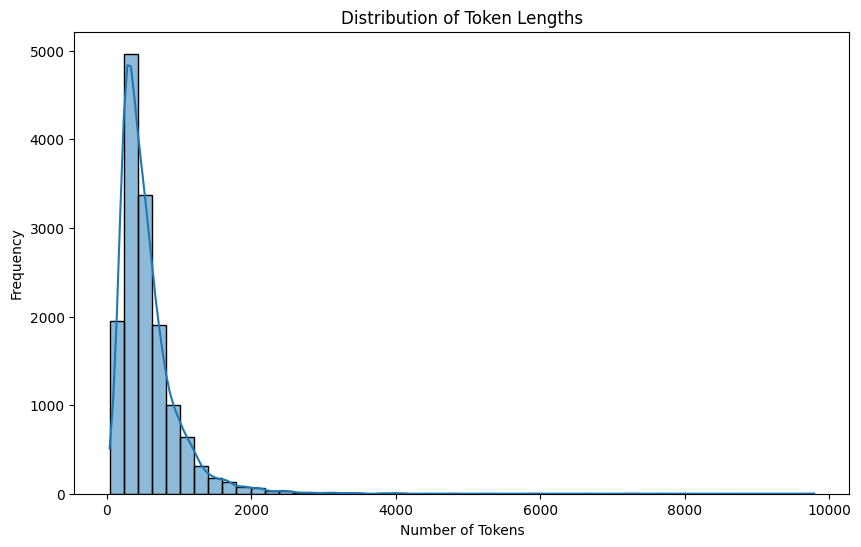

Maximum tokens (9793) plus buffer exceed current n_ctx (4096). Consider increasing n_ctx.


In [18]:
# Define your prompt templates
PROMPT_TEMPLATES = {
    "YES_NO_COT_PROMPT_TEMPLATE": "Please analyze the following subsection:\nTitle: {subsection_title}\nText: {subsection_text}\n\nDoes the text mention that the company is exposed to risks associated with cyclical products? Answer with Yes or No.",
    "YES_NO_BASE_PROMPT_TEMPLATE": "Analyze the subsection below.\nTitle: {subsection_title}\nText: {subsection_text}\n\nDoes the text mention exposure to cyclical product risks? Yes or No."
}

# Select the prompt template you are using
selected_prompt_template = PROMPT_TEMPLATES["YES_NO_COT_PROMPT_TEMPLATE"]

# Initialize the tokenizer
tokenizer = LlamaTokenizerFast.from_pretrained('hf-internal-testing/llama-tokenizer')

# Define the columns
SUBSECTION_TITLE_COLUMN = 'Subsubsection Title'  # Replace with your actual column name
SUBSECTION_TEXT_COLUMN = 'Subsubsection Text'    # Replace with your actual column name

# Ensure the columns exist
if SUBSECTION_TITLE_COLUMN not in df.columns or SUBSECTION_TEXT_COLUMN not in df.columns:
    raise ValueError(f"Required columns '{SUBSECTION_TITLE_COLUMN}' or '{SUBSECTION_TEXT_COLUMN}' not found in the data.")

# Function to create the prompt and calculate token length
def calculate_token_length(row):
    prompt = selected_prompt_template.format(
        subsection_title=row[SUBSECTION_TITLE_COLUMN],
        subsection_text=row[SUBSECTION_TEXT_COLUMN]
    )
    tokens = tokenizer.encode(prompt, add_special_tokens=False)
    return len(tokens)

# Apply the function to each row to get token lengths
df['token_length'] = df.apply(calculate_token_length, axis=1)

# Maximum token length
max_tokens = df['token_length'].max()
max_token_row = df.loc[df['token_length'].idxmax()]
print(f"Maximum number of tokens in a prompt: {max_tokens}")

print("\nDetails of the prompt with maximum tokens:")
print(f"Subsection Title: {max_token_row[SUBSECTION_TITLE_COLUMN]}")
print(f"Subsection Text: {max_token_row[SUBSECTION_TEXT_COLUMN]}")
print(f"Prompt: {selected_prompt_template.format(subsection_title=max_token_row[SUBSECTION_TITLE_COLUMN], subsection_text=max_token_row[SUBSECTION_TEXT_COLUMN])}")

# Additional statistics
print("\nToken Length Statistics:")
print(df['token_length'].describe())

# Visualize the distribution
plt.figure(figsize=(10,6))
sns.histplot(df['token_length'], bins=50, kde=True)
plt.title('Distribution of Token Lengths')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()

# Decide on n_ctx
current_n_ctx = 4096  # As set in your script
buffer = 100  # Additional buffer

if max_tokens + buffer > current_n_ctx:
    print(f"Maximum tokens ({max_tokens}) plus buffer exceed current n_ctx ({current_n_ctx}). Consider increasing n_ctx.")
else:
    print(f"Maximum tokens ({max_tokens}) plus buffer are within the current n_ctx ({current_n_ctx}).")

In [20]:
# List of n_ctx values to evaluate
n_ctx_values = [8192, 4096, 2048]

# Check and print the number of rows exceeding each n_ctx value
for current_n_ctx in n_ctx_values:
    rows_exceeding_n_ctx = (df['token_length'] > current_n_ctx).sum()
    print(f"Number of rows exceeding n_ctx ({current_n_ctx}): {rows_exceeding_n_ctx}")

Number of rows exceeding n_ctx (8192): 3
Number of rows exceeding n_ctx (4096): 15
Number of rows exceeding n_ctx (2048): 181


### Merge with issuer data from DB

In [60]:
from capfourpy.databases import Database
db = Database(database="C4DW")

issuer_data_query = """
WITH RankedIssuerData AS (
  SELECT 
    RmsId, 
    AbbrevName, 
    CapFourIndustry, 
    CountryIsoOperating,
    ROW_NUMBER() OVER (PARTITION BY RmsId ORDER BY AbbrevName ASC) AS rn
  FROM [C4DW].[DailyOverview].[IssuerData]
  WHERE RmsId IS NOT NULL 
    AND RmsId > 0
	AND CapFourIndustry IS NOT NULL
	AND CountryIsoOperating IS NOT NULL
)
SELECT 
  RmsId, 
  AbbrevName, 
  CapFourIndustry, 
  CountryIsoOperating
FROM RankedIssuerData
WHERE rn = 1;
"""

data_database = db.read_sql(issuer_data_query)

# Merge data from df with data from data_database left on RmsId
df = df.merge(data_database, on='RmsId', how='left')
df


,Prospectus ID,Original Filename,Section ID,Section Title,Subsection ID,Subsection Title,Subsubsection ID,Subsubsection Title,Subsubsection Text,Parsing Error,From Folder,Prospectus Year,RmsId,AbbrevName,CapFourIndustry,CountryIsoOperating
0,5,Preliminary Offerings 2021.pdf,failed parsing,failed parsing,failed parsing,failed parsing,failed parsing,failed parsing,failed parsing,Exception occurred: local variable 'section_id...,raw_manual,2021,5,Adler Group,Real Estate,DE
1,5_1,Offerings 2020.pdf,1,RISK FACTORS,1.1,Risks related to the ADLER Group’s Business Ac...,1.1.1,Our business is significantly dependent on our...,We rely significantly on rental income. In the...,NaN,raw_manual,2020,5,Adler Group,Real Estate,DE
2,5_1,Offerings 2020.pdf,1,RISK FACTORS,1.1,Risks related to the ADLER Group’s Business Ac...,1.1.1,Our business is significantly dependent on our...,We rely significantly on rental income. In the...,NaN,raw_manual,2020,5,Adler Group,Real Estate,DE
3,5_1,Offerings 2020.pdf,1,RISK FACTORS,1.1,Risks related to the ADLER Group’s Business Ac...,1.1.2,Our ability to operate our business successful...,We face the risk that we may not be able to ge...,NaN,raw_manual,2020,5,Adler Group,Real Estate,DE
4,5_1,Offerings 2020.pdf,1,RISK FACTORS,1.1,Risks related to the ADLER Group’s Business Ac...,1.1.3,We rely on our ability to identify potential r...,"As part of our strategy, we evaluate real esta...",NaN,raw_manual,2020,5,Adler Group,Real Estate,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14725,1994,Preliminary Offerings 2024.pdf,1,RISK FACTORS,1.6,Risks Related to Our Indebtedness and the Notes,1.6.35,Unless the Acquisition will be consummated on ...,Unless the Acquisition will be consummated on ...,NaN,raw_manual,2024,1994,Truist Insurance,Insurance,US
14726,1994,Preliminary Offerings 2024.pdf,1,RISK FACTORS,1.6,Risks Related to Our Indebtedness and the Notes,1.6.36,If this offering closes prior to the consummat...,If this offering closes prior to the consummat...,NaN,raw_manual,2024,1994,Truist Insurance,Insurance,US
14727,1994,Preliminary Offerings 2024.pdf,1,RISK FACTORS,1.6,Risks Related to Our Indebtedness and the Notes,1.6.37,"In a bankruptcy proceeding, the holders of not...",If either of the Escrow Issuers commences a ba...,NaN,raw_manual,2024,1994,Truist Insurance,Insurance,US
14728,1994,Preliminary Offerings 2024.pdf,1,RISK FACTORS,1.7,NaN,1.7.1,NaN,_Investing in our notes involves a high degree...,NaN,raw_manual,2024,1994,Truist Insurance,Insurance,US


### Basic Statistics

In [61]:
# Print Unique RmsIds
print(f"Unique RmsIds: {df['RmsId'].nunique()}")

Unique RmsIds: 199


In [62]:
# Identify the largest suffix per RmsId
df['Suffix'] = df['Prospectus ID'].str.split('_').str[1].fillna('0').astype(int)
largest_suffix_df = df.loc[df.groupby('RmsId')['Suffix'].idxmax()]

# Filter rows with "failed parsing" in 'Section ID'
failed_parsing_df = largest_suffix_df[largest_suffix_df['Section ID'] == 'failed parsing']
print(f"Count of distinct RmsId with 'failed parsing' in the largest suffix or single ID: ")
print(failed_parsing_df['RmsId'].nunique())

# Filter rows where "Section ID" is NOT "failed parsing"
non_failed_parsing_df = largest_suffix_df[largest_suffix_df['Section ID'] != 'failed parsing']
print(f"Count of distinct RmsId without 'failed parsing' in the largest suffix or single ID: ")
print(non_failed_parsing_df['RmsId'].nunique())



Count of distinct RmsId with 'failed parsing' in the largest suffix or single ID: 
21
Count of distinct RmsId without 'failed parsing' in the largest suffix or single ID: 
178


**Countries**

In [73]:
# Count distinct RmsId within each CountryIsoOperating
distinct_rmsid_country = df.groupby('CountryIsoOperating')['RmsId'].nunique().reset_index()
distinct_rmsid_country.rename(columns={'RmsId': 'Distinct_RmsId_Count'}, inplace=True)

distinct_rmsid_country

,CountryIsoOperating,Distinct_RmsId_Count
0,AE,1
1,BE,1
2,BS,1
3,CA,5
4,CH,3
5,DE,17
6,DK,4
7,ES,4
8,FI,2
9,FR,13


**Industries**

In [66]:
# Count distinct RmsId within each CapFourIndustry
distinct_rmsid_industry = df.groupby('CapFourIndustry')['RmsId'].nunique().reset_index()
distinct_rmsid_industry.rename(columns={'RmsId': 'Distinct_RmsId_Count'}, inplace=True)

print(distinct_rmsid_industry)

             CapFourIndustry  Distinct_RmsId_Count
0                 Automotive                     9
1             Basic Industry                    26
2              Capital Goods                    19
3             Consumer Goods                    14
4         Financial Services                     7
5                 Healthcare                    18
6                  Insurance                     6
7                    Leisure                    13
8                      Media                    10
9                Real Estate                     4
10                    Retail                    17
11                  Services                    24
12  Technology & Electronics                    11
13        Telecommunications                    16
14            Transportation                     2
15                   Utility                     3


**Years**

In [65]:
# Count distinct RmsId within each Prospectus Year
distinct_rmsid_year = df.groupby('Prospectus Year')['RmsId'].nunique().reset_index()
distinct_rmsid_year.rename(columns={'RmsId': 'Distinct_RmsId_Count'}, inplace=True)

print(distinct_rmsid_year)

    Prospectus Year  Distinct_RmsId_Count
0              2007                     1
1              2010                     1
2              2012                     4
3              2013                     3
4              2014                     7
5              2015                     7
6              2016                    11
7              2017                    13
8              2018                    17
9              2019                    15
10             2020                    42
11             2021                    77
12             2022                    15
13             2023                    30
14             2024                    39


### Document Statistics

In [71]:
# Add a column for the length of 'Subsubsection Title'
df['Subsubsection_Title_Length'] = df['Subsubsection Title'].astype(str).str.len()
df['Subsubsection_Text_Length'] = df['Subsubsection Text'].astype(str).str.len()

df[['Subsubsection Title', 'Subsubsection_Title_Length', 'Subsubsection Text', 'Subsubsection_Text_Length']].head()

,Subsubsection Title,Subsubsection_Title_Length,Subsubsection Text,Subsubsection_Text_Length
0,failed parsing,14,failed parsing,14
1,Our business is significantly dependent on our...,209,We rely significantly on rental income. In the...,365
2,Our business is significantly dependent on our...,209,We rely significantly on rental income. In the...,2591
3,Our ability to operate our business successful...,413,We face the risk that we may not be able to ge...,4817
4,We rely on our ability to identify potential r...,345,"As part of our strategy, we evaluate real esta...",6745


In [72]:
# Group by 'Prospectus ID' and count the number of rows
prospectus_counts = df.groupby('Prospectus ID').size().reset_index(name='Row_Count')

# Calculate minimum, average, and maximum
min_count = prospectus_counts['Row_Count'].min()
avg_count = prospectus_counts['Row_Count'].mean()
max_count = prospectus_counts['Row_Count'].max()

print(f"Minimum number of rows per Prospectus ID: {min_count}")
print(f"Average number of rows per Prospectus ID: {avg_count:.2f}")
print(f"Maximum number of rows per Prospectus ID: {max_count}")

Minimum number of rows per Prospectus ID: 1
Average number of rows per Prospectus ID: 40.92
Maximum number of rows per Prospectus ID: 207
